In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Testes estatísticos de significância

- O papel de testes estatísticos é dar evidencias que dois (ou mais) conjuntos de dados não vieram da mesma fonte.

Você rodou 2 versões de um programa em vários dados:

- programa 1 demorou 10.30, 12.08, 9.33, 9.62, 9.88 (segundos) em 5 exemplos
- programa 2 demorou 9.23, 9.84, 8.55, 10.42 em outros 4 exemplos.

Há dois conjuntos de dados. Não existe teste para 2 números um contra o outro, só conjuntos de dados

- Dizer que os dois conjuntos de dados são “diferentes” é numa primeira aproximação dizer que esses dados vieram de duas fontes de dados (“populações”) diferentes.

- Ou melhor, dizer que dois conjuntos são **diferentes** é dizer que é bem **improvável** que os dados vieram da **mesma** fonte.


**Exemplo extraído do livro do Forsyth**

Imagine we hypothesize that the average human body temperature is 95F (35C). We collect temperature measurements $x_i$ from a random sample of $N$ people. The mean of this sample is unlikely to be 95F (35C). The sample will likely have too many people who run too hot, or too cool, to get exactly the number we expect. We must now find what caused the difference between the sample mean and the value we hypothesized. We could be wrong about the average body temperature. Alternatively, we could be right, and the difference might just be because the sample is randomly chosen. We can assess the significance of the evidence against the hypothesis by finding out what fraction of samples would give us sample means like the one we observe if the hypothesis is true.

## Erros de amostragem (ou ruídos de amostragem)

Dados retirados (amostrados) de uma mesma fonte podem ter médias diferentes. A diferença é apenas por causa da sorte ou do azar. Isso é chamado de *erro de amostragem*. O nome erro não é um bom nome, pense como *ruído de amostragem*

Vejamos um exemplo. Primeiro vamos gerar um população com 10.000 números aleatórios, com média 100 e desvio padrão 30.

In [9]:
np.random.seed(1234)
pop = np.random.normal(100,30,size=10000)

Vamos gerar um histograma para verificar se os dados se assemelham a uma distribuição normal realmente.

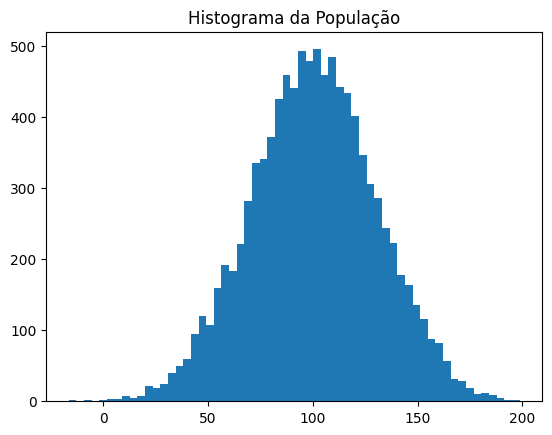

In [4]:
plt.hist(pop, bins='auto')
plt.title("Histograma da População")
plt.show()

Vamos gerar duas amostras vindas dessa população e calcular suas médias.

In [21]:
p1 = np.random.choice(pop, 10)
np.mean(p1)

109.52006525839138

In [18]:
p2 = np.random.choice(pop, 12)
np.mean(p2)

106.59508290301123

Vamos assumir que **p2** são os tempos de execução do seu programa e **p1** são os tempos de execução de um programa conhecido publicado na literatura, e seu mestrado é fazer uma implementação mais rápida do programa **p1**

Voce pode dizer a sua orientadora que vc terminou o mestrado ja que voce criou um programa que é por volta de **X**% mais rápido que o estado da arte? Rode várias vezes as células acima e veja se é possível fazer alguma afirmação.

## Teste

Um teste estatístico informa a probabilidade de que os dados sejam tão (ou mais) diferentes quanto eles são tendo em vista que eles vieram da mesma fonte de dados. Esse valor é chamado de *p-valor* ou *p-value*

Se a probabilidade é alta então é provável que a diferença que voce encontrou na média (ou outras medidas - mais abaixo) é apenas devido a sorte (ruído de amostragem).

Se a probabilidade é baixa então voce pode dizer que é pouco provável que os dados vieram de uma mesma fonte, ou 

Se a probabilidade é baixa voce pode dizer que é bem provável que os dados realmente vieram de 2 fontes diferentes.

O termo oficial para dizer que *é bem provável que os dados realmente vieram de 2 fontes diferentes* é a **diferença é estatisticamente significante** ou **a diferença é estatisticamente significativa**

**Definição de p-valor no livro do Forsyth**

The *p-value* represents the fraction of samples that would give a more extreme value of the test statistic than that observed, if the hypothesis was true.

### Test Student T-test
Vamos aplicar o teste Student T-test para as duas amostras dos programas **p1** e **p2** acima. 

In [22]:
stats.ttest_ind(p1,p2)


Ttest_indResult(statistic=0.16463265886201361, pvalue=0.8708856758933743)

Vamos agora gerar uma amostra de tamanho parecido mas sabidamente com distribuição diferente e rodar novamente o teste contra a nossa amostra p1.

In [35]:
a = np.random.normal(150,30,size=12)
print(a)

[184.69774376 145.68338199 148.1152241  144.53880962 140.27896393
 189.74013388 164.15271868 140.73252775 142.25038003 157.36451562
 133.10708729 151.64674637]


In [20]:
stats.ttest_ind(p1,a)

Ttest_indResult(statistic=-3.9432460844483317, pvalue=0.0006925788114184218)

Compare os resultados dos dois testes acima. Veja a diferença dos *pvalues* gerados. Faz sentido?

### Valor usado como decisão: *p < 0.05*

Tradicionalmente, na maioria das Ciências e em particular em Computação usa-se o valor de 0.05 de p-valor para afirmar que a diferença é estatisticamente significante

Na prática, se o p-valor do seu teste der 0.051 você não tem um paper para publicar!!!

Há criticas sobre usar o p-valor como decisão, e veremos isso numa próxima aula, mas tradicionalmente essa é a prática.

### Testes não paramétricos

Usados quando os parâmetros de distribuição não são conhecidos. Ex: Vamos repetir os testes acima usando o teste de Wilcoxon.

In [25]:
stat, p = stats.wilcoxon(p1)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.000, p=0.002
Probably different distributions


In [32]:
p1 = np.random.choice(pop, 12)  #Wilcoxon para dois conjuntos de dados precisa ter o mesmo número de valores em ambos.

stat, p = stats.wilcoxon(p1,p2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=37.000, p=0.910
Probably the same distribution


In [36]:
stat, p = stats.wilcoxon(p1,a)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=2.000, p=0.001
Probably different distributions


## Resumo: teste estatísticos

- Você tem dois conjuntos de dados A e B.

- Assuma que eles vieram de uma mesma fonte de dados F (cujos detalhes você não sabe). Isso é chamado de hipótese nula.

- Calcule a probabilidade que 2 amostras dessa fonte F tenham as médias tão diferentes quanto as médias de A e B. Essa probabilidade é chamada de p-valor

- Se o p-valor é alto, então é mais provável que A e B venham dessa mesma fonte e a diferença nas médias é apenas devido a “sorte”

- Se o p-valor for baixo então há baixa chance que dados tão diferentes quanto os de A e B tenham vindo desta mesma fonte F. Se eles vieram de “fontes diferentes” então a diferença entre eles não é apenas por causa da sorte.

- Em Ciência em geral, assume-se que p-valores menores que 0.05 (ou 95% de confiança) são evidência suficiente que os dados não vieram de uma mesma fonte.

- Assim, se o p-valor é baixo (<0.05), você tem alguma evidência que os conjuntos de dados são realmente diferentes (não vieram da mesma fonte) e diz-se que a diferença é **estatisticamente significante** (com 95% de confiança)

- Se o p-valor é alto (>0.05) não há nada que você pode dizer. Você **não** mostrou que os dados são **semelhantes** ou **iguais**. Você apenas não conseguiu mostrar que eles são diferentes!!!

- Assim normalmente você quer um p-valor baixo

- O papel de testes estatísticos é dar evidencias que a diferença entre a média de dois (ou mais) *conjuntos* de dados não é devido apenas a sorte (ou ao ruído de amostragem)

- Exemplos de uso de testes em Python (incluindo os de Wilcoxon acima): https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/
- Veja material do Prof. Wainer para instruções sobre rodar os testes em R.

# Intervalo de Confiança

**Definição do livro do Forsyth**

Choose some fraction $f$ . An $f$ confidence interval for a population mean is an interval constructed using the sample mean. It has the property that for that fraction $f$ of all samples, the population mean will lie inside the interval constructed from each sample’s mean.